<a href="https://colab.research.google.com/github/LeticiaCoitinho/A3-IA/blob/main/Entrega5KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv("Employee.csv")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

data.drop('City',axis=1,inplace=True)
data.drop('JoiningYear', axis=1, inplace=True)

le = preprocessing.LabelEncoder()
Education_encode = le.fit_transform(data['Education'])
Gender_encode = le.fit_transform(data['Gender'])
EverBenched_encode = le.fit_transform(data['EverBenched'])
print(Education_encode)
print(Gender_encode)
print(EverBenched_encode)

[0 0 0 ... 1 0 0]
[1 0 0 ... 1 1 1]
[0 0 0 ... 0 1 1]


In [ ]:
data.drop(['Education', 'Gender', 'EverBenched'], axis=1, inplace=True)

In [ ]:
X = data[['PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot' ]]
X['Education'] = Education_encode
X['Gender'] = Gender_encode
y = EverBenched_encode
print(X)
print(y)

      PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  Education  \
0               3   34                          0           0          0   
1               1   28                          3           1          0   
2               3   38                          2           0          0   
3               3   27                          5           1          1   
4               3   24                          2           1          1   
...           ...  ...                        ...         ...        ...   
4648            3   26                          4           0          0   
4649            2   37                          2           1          1   
4650            3   27                          5           1          1   
4651            3   30                          2           0          0   
4652            3   33                          4           0          0   

      Gender  
0          1  
1          0  
2          0  
3          1  
4          1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


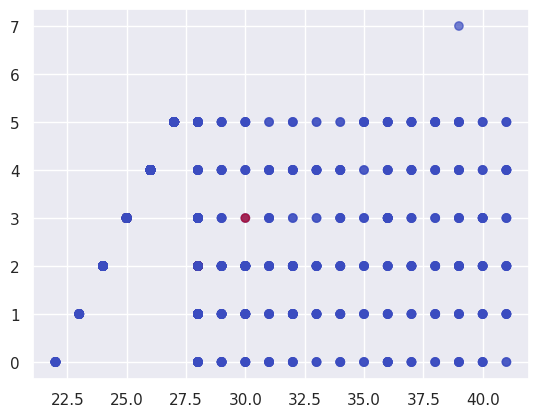

In [ ]:
plt.scatter(
    X_test['Age'],
    X_test['ExperienceInCurrentDomain'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(knn.score(X_test, y_test))

[[1036   15]
 [ 113    0]]
0.8900343642611683
